In [45]:
#Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ppl
import scipy
%matplotlib inline

In [46]:
bd=pd.read_csv('Y:\IESS_2020\Data\SSC\FWid_ACT_SSC.txt',sep=';', header=0, 
               dtype={'CEDULA_CONYUGE':'object','SEXO_CONY':'object', 'FECHA_MUERTE_CONY':'object',
                      'FECHA_NACIMIENTO_CONY':'object'}) #existen 405769 cedulas distintas

In [47]:
bd=bd[ (bd['FECHA_MUERTE_AFI'].isnull()==True) & (bd['FECHA_MUERTE_CONY'].isnull()==True) ]

In [48]:
# bd.groupby(["EDAD_AFI"]).count().sum() #existen 405769 cedulas distintas
bd['CEDULA_AFI'].value_counts().sum()

381382

In [49]:
bd=bd.rename(columns={'CEDULA_AFI':'hh', 'SEXO_AFI':'sexo', 'EDAD_AFI':'edad', 'ESTADO_CIVIL_AFI':'ec'})
bd['ec']=bd['ec'].map({'CASADO/A':'1', 'UNION DE HECHO':'2', 'DIVORCIADO/A':'4', 'VIUDO/A':'5', 'SOLTERO/A':'6'})
bd['peso']=1
bd

,hh,FECHA_NACIMIENTO_AFI,sexo,edad,FECHA_MUERTE_AFI,EDAD_MUERTE_AFI,ec,CEDULA_CONYUGE,FECHA_NACIMIENTO_CONY,SEXO_CONY,EDAD_CONY,FECHA_MUERTE_CONY,EDAD_MUERTE_CONY,peso
0,100861137,27/05/1947,M,73,NaN,0,1,0100013929,18/05/1945,H,75.0,NaN,NaN,1
2,101893758,08/12/1961,M,59,NaN,0,1,0100018357,13/02/1948,H,72.0,NaN,NaN,1
3,1004557292,18/06/1992,H,28,NaN,0,1,1050220381,17/11/1997,M,23.0,NaN,NaN,1
4,100436286,04/08/1946,H,74,NaN,0,1,0100023530,25/05/1947,M,73.0,NaN,NaN,1
5,1201468517,01/03/1943,M,77,NaN,0,1,0100050319,19/02/1931,H,89.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405764,800550121,21/05/1947,H,73,NaN,0,6,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
405765,800184475,03/02/1935,H,85,NaN,0,1,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
405766,500747944,22/11/1945,M,75,NaN,0,5,0500044343,NaN,NaN,NaN,NaN,NaN,1
405767,500935002,26/06/1959,H,61,NaN,0,1,50121284,NaN,NaN,NaN,NaN,NaN,1


In [50]:
civilstate=bd.groupby(['sexo','edad','ec'])['hh'].count().unstack(2).fillna(0)

In [51]:
civilstate

ec           1    2    4    5      6
sexo edad                           
H    16    0.0  0.0  0.0  0.0    3.0
     17    0.0  0.0  0.0  0.0    3.0
     18    0.0  0.0  0.0  0.0   41.0
     19    2.0  0.0  0.0  0.0  211.0
     20    9.0  0.0  0.0  0.0  466.0
...        ...  ...  ...  ...    ...
M    98    0.0  0.0  0.0  0.0    4.0
     99    2.0  0.0  0.0  1.0    0.0
     100   1.0  0.0  0.0  1.0    2.0
     104   1.0  0.0  0.0  0.0    0.0
     108   0.0  0.0  0.0  1.0    0.0

[179 rows x 5 columns]

In [52]:
#Se toma los estados casados o unión de hecho
# Porque se filtra desde la edad 30, o posición 15??
p_m=(civilstate[[str(i) for i in [1,2]]].sum(axis=1)/civilstate.sum(axis=1)).unstack(0).reindex(range(15,101))
p_m

sexo,H,M
edad,,
15,NaN,0.000000
16,0.000000,0.000000
17,0.000000,0.000000
18,0.000000,0.015873
19,0.009390,0.039823
...,...,...
96,0.750000,0.083333
97,0.790698,0.250000
98,0.857143,0.000000


<AxesSubplot:xlabel='edad'>

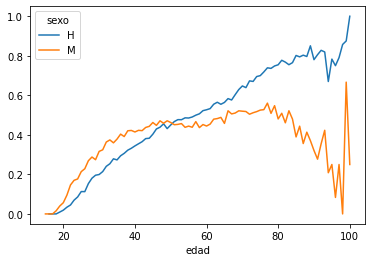

In [53]:
p_m.plot()

In [54]:
# promedio de 12 observaciones, tomando como centro la observación
p_m=p_m.rolling(center=True,window=12,min_periods=1).mean()
p_m

sexo,H,M
edad,,
15,0.005667,0.018739
16,0.010373,0.029626
17,0.015345,0.044219
18,0.022119,0.058188
19,0.029188,0.070057
...,...,...
96,0.814409,0.280378
97,0.817820,0.276317
98,0.819192,0.276250


<AxesSubplot:xlabel='edad'>

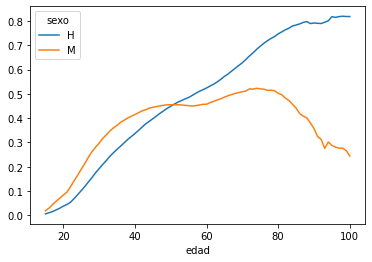

In [55]:
p_m.plot()

In [56]:
married=bd[bd['ec']=='1'].append(bd[bd['ec']=='2'])
married

,hh,FECHA_NACIMIENTO_AFI,sexo,edad,FECHA_MUERTE_AFI,EDAD_MUERTE_AFI,ec,CEDULA_CONYUGE,FECHA_NACIMIENTO_CONY,SEXO_CONY,EDAD_CONY,FECHA_MUERTE_CONY,EDAD_MUERTE_CONY,peso
0,100861137,27/05/1947,M,73,NaN,0,1,0100013929,18/05/1945,H,75.0,NaN,NaN,1
2,101893758,08/12/1961,M,59,NaN,0,1,0100018357,13/02/1948,H,72.0,NaN,NaN,1
3,1004557292,18/06/1992,H,28,NaN,0,1,1050220381,17/11/1997,M,23.0,NaN,NaN,1
4,100436286,04/08/1946,H,74,NaN,0,1,0100023530,25/05/1947,M,73.0,NaN,NaN,1
5,1201468517,01/03/1943,M,77,NaN,0,1,0100050319,19/02/1931,H,89.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336273,1302235831,30/05/1936,H,84,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
349005,913826061,14/07/1970,M,50,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
380844,1400166300,15/07/1961,M,59,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
388648,1706445853,18/05/1952,H,68,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1


In [57]:
married[married['sexo']=='H']

,hh,FECHA_NACIMIENTO_AFI,sexo,edad,FECHA_MUERTE_AFI,EDAD_MUERTE_AFI,ec,CEDULA_CONYUGE,FECHA_NACIMIENTO_CONY,SEXO_CONY,EDAD_CONY,FECHA_MUERTE_CONY,EDAD_MUERTE_CONY,peso
3,1004557292,18/06/1992,H,28,NaN,0,1,1050220381,17/11/1997,M,23.0,NaN,NaN,1
4,100436286,04/08/1946,H,74,NaN,0,1,0100023530,25/05/1947,M,73.0,NaN,NaN,1
8,100064971,25/10/1937,H,83,NaN,0,1,0100064989,05/11/1948,M,72.0,NaN,NaN,1
11,100066307,28/07/1944,H,76,NaN,0,1,0100066299,03/04/1943,M,77.0,NaN,NaN,1
15,100532605,19/08/1944,H,76,NaN,0,1,0100080514,22/01/1939,M,81.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173207,2000050845,15/05/1978,H,42,NaN,0,2,0961390184,24/10/1990,M,30.0,NaN,NaN,1
232705,1307967164,22/12/1972,H,48,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
336273,1302235831,30/05/1936,H,84,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1
388648,1706445853,18/05/1952,H,68,NaN,0,2,NO CONYUGE,NaN,NaN,NaN,NaN,NaN,1


In [58]:
edades=married[married['sexo']=='H'].groupby(['edad', 'EDAD_CONY'])['hh'].count().unstack(1).fillna(0)
#edades=married.groupby(['edad', 'EDAD_CONY'])['hh'].count().unstack(1).fillna(0).reindex(range(15,105))
edades

EDAD_CONY,13.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,96.0,97.0,98.0,99.0,100.0,101.0,104.0,105.0,106.0,126.0
edad,,,,,,,,,,,,,,,,,,,,,
19,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,1.0,4.0,5.0,3.0,7.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,1.0,5.0,11.0,10.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,2.0,0.0,11.0,9.0,14.0,12.0,12.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Porque se resta 13 y se divide para 87????
mean_edad_esposa=((edades*(edades.columns-13)/87).sum(axis=1)/(edades.sum(axis=1)))
mean_edad_esposa

edad
19     0.068966
20     0.096264
21     0.096817
22     0.104691
23     0.116121
         ...   
101    0.862069
102    0.873563
103    0.931034
105    0.896552
110    0.758621
Length: 87, dtype: float64

<AxesSubplot:xlabel='edad'>

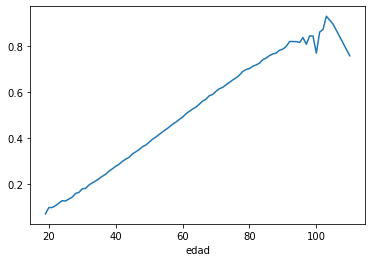

In [60]:
mean_edad_esposa.plot()

In [61]:
mean_edad_esposo=(edades.mul((edades.index-13)/87,axis=0).sum()/edades.sum())
mean_edad_esposo

EDAD_CONY
13.0     0.804598
17.0     0.678161
18.0     0.140230
19.0     0.167189
20.0     0.169050
           ...   
101.0    0.896552
104.0    0.643678
105.0    0.678161
106.0    0.747126
126.0    0.735632
Length: 90, dtype: float64

<AxesSubplot:xlabel='EDAD_CONY'>

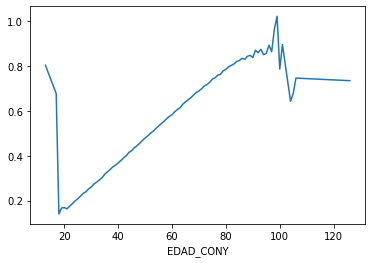

In [62]:
mean_edad_esposo.plot()

In [63]:
sd_edad_esposa=np.sqrt((edades*(edades.columns-13)/87*(edades.columns-13)/87).sum(axis=1)/edades.sum(axis=1)-mean_edad_esposa**2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='edad'>

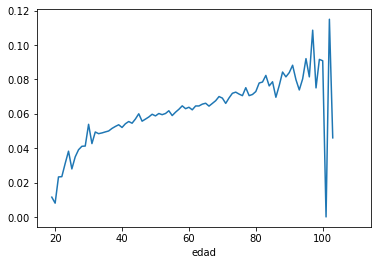

In [64]:
sd_edad_esposa.plot()

In [65]:
sd_edad_esposo=np.sqrt(edades.mul(((edades.index-13)/87)**2,axis=0).sum()/edades.sum()-mean_edad_esposo**2)

<AxesSubplot:xlabel='EDAD_CONY'>

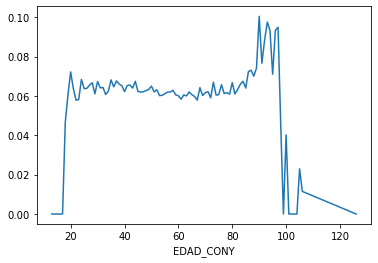

In [66]:
sd_edad_esposo.plot()

In [67]:
def basic(x,a):
    return a
def logagrowth(x,a,b,c):
    return np.exp(np.log(c+x)-np.log(a+(b*x)))
def exp_logagrowht(x,a,b):
    return a+(b*x)
def trinomio(x,a,b,c,d):
    return a+b*x+c*x**2+d*x**3
def approximacion_basic(serie,a_inf,a_sup,sample):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(basic,xdata=range(a_inf,a_sup+1),ydata=serie_df.loc[a_inf:a_sup]['serie'],
                          sigma=serie_df.loc[a_inf:a_sup]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(basic,args=([test[0]]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_logagrowth(serie,a_inf,a_sup,sample):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(logagrowth,xdata=range(a_inf,a_sup+1),ydata=serie_df.loc[a_inf:a_sup]['serie'],
                          sigma=serie_df.loc[a_inf:a_sup]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(logagrowth,args=(test[0],test[1],test[2]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]<1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)
    
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_e_logagrowth(serie,a_inf,a_sup,sample):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(exp_logagrowht,xdata=range(a_inf,a_sup+1),ydata=serie_df.loc[a_inf:a_sup]['serie'],
                          sigma=serie_df.loc[a_inf:a_sup]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(exp_logagrowht,args=(test[0],test[1]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=1-(serie_df['smooth'].loc[i]>1)
    serie_df['smooth']=serie_df['smooth'].map({0:1}).fillna(serie_df['smooth'])

    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)

    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df
def approximacion_curvas_trinomio(serie,a_inf,a_sup,sample):
    serie_df=pd.DataFrame(serie.loc[a_inf:a_sup])
    serie_df.columns=['serie']
    serie_df['age']=serie_df.index
    serie_df['sample']=sample.loc[a_inf:a_sup]
    serie_df['sigma']=1/(serie_df['sample']/serie_df['sample'].max())
    test=scipy.optimize.curve_fit(trinomio,xdata=range(a_inf,a_sup+1),ydata=serie_df.loc[a_inf:a_sup]['serie'],
                          sigma=serie_df.loc[a_inf:a_sup]['sigma'],absolute_sigma=False)[0]
    serie_df['smooth']=serie_df.loc[a_inf:a_sup]['age'].apply(trinomio,args=(test[0],test[1],test[2],test[3]))
    for i in serie_df.index:
        serie_df['smooth'].loc[i]*=(serie_df['smooth'].loc[i]>0)    
    serie_df['serie'].plot(kind='line').axes.set_xlim(a_inf,a_sup)
    serie_df['smooth'].plot(kind='line').set_xlim(a_inf,a_sup)
    ppl.savefig('smooth.png')
    return serie_df

C:\Users\CRISTI~1.GUA\AppData\Local\Temp/ipykernel_3292/2555293283.py:4: RuntimeWarning: invalid value encountered in log
  return np.exp(np.log(c+x)-np.log(a+(b*x)))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


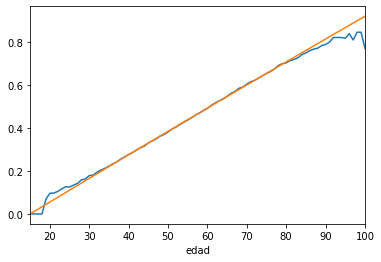

In [68]:
m_esposa=approximacion_curvas_logagrowth(serie=mean_edad_esposa.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum(axis=1).reindex(range(15,101)).fillna(0))['smooth']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


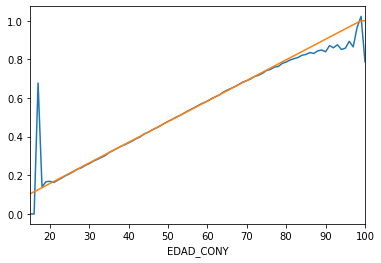

In [69]:
m_esposo=approximacion_curvas_e_logagrowth(serie=mean_edad_esposo.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum().reindex(range(15,101)).fillna(0))['smooth']

C:\Users\CRISTI~1.GUA\AppData\Local\Temp/ipykernel_3292/2555293283.py:4: RuntimeWarning: invalid value encountered in log
  return np.exp(np.log(c+x)-np.log(a+(b*x)))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


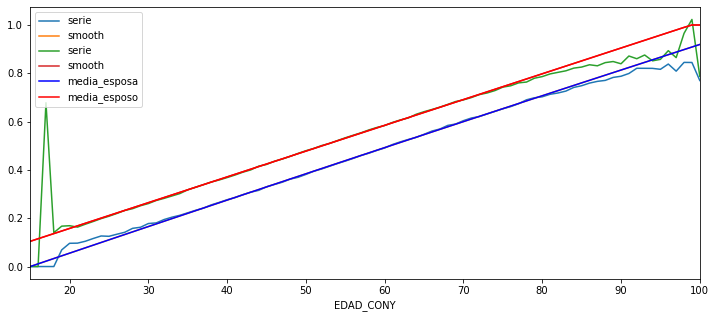

In [70]:
ppl.figure(figsize=(12,5))
ppl.xlabel('Edad')

m_esposa=approximacion_curvas_logagrowth(serie=mean_edad_esposa.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum(axis=1).reindex(range(15,101)).fillna(0))['smooth']
m_esposo=approximacion_curvas_e_logagrowth(serie=mean_edad_esposo.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum().reindex(range(15,101)).fillna(0))['smooth']

ax1 =m_esposa.plot(color='blue',label='media_esposa')
ax2 =m_esposo.plot(color='red',label='media_esposo')

ax1.legend(loc=1)
ax2.legend(loc=2)

ppl.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


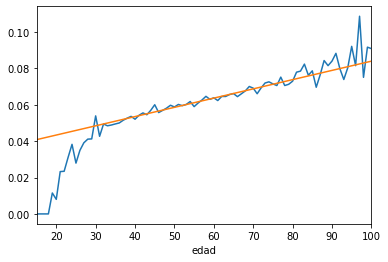

In [71]:
s_esposa=approximacion_curvas_e_logagrowth(serie=sd_edad_esposa.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum(axis=1).reindex(range(15,101)).fillna(0))['smooth']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


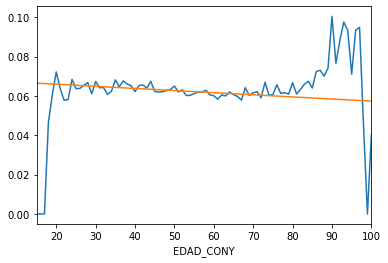

In [72]:
s_esposo=approximacion_curvas_e_logagrowth(serie=sd_edad_esposo.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum().reindex(range(15,101)).fillna(0))['smooth']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


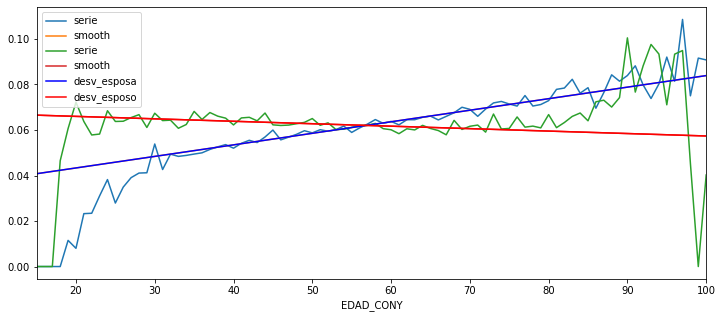

In [73]:
ppl.figure(figsize=(12,5))
ppl.xlabel('Edad')

s_esposa=approximacion_curvas_e_logagrowth(serie=sd_edad_esposa.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum(axis=1).reindex(range(15,101)).fillna(0))['smooth']
s_esposo=approximacion_curvas_e_logagrowth(serie=sd_edad_esposo.reindex(range(15,101)).fillna(0),a_inf=15,a_sup=100,sample=edades.sum().reindex(range(15,101)).fillna(0))['smooth']


ax1 =s_esposa.plot(color='blue',label='desv_esposa')
ax2 =s_esposo.plot(color='red',label='desv_esposo')

ax1.legend(loc=1)
ax2.legend(loc=2)

ppl.show()

In [74]:
alpha_esposo=((1-m_esposo)/(s_esposo**2)-1/m_esposo)*m_esposo**2
beta_esposo=alpha_esposo*(1/m_esposo-1)
alpha_esposa=((1-m_esposa)/(s_esposa**2)-1/m_esposa)*m_esposa**2
beta_esposa=alpha_esposa*(1/m_esposa-1)

In [75]:
alpha_esposo

EDAD_CONY
15     2.100996
16     2.540905
17     3.017647
18     3.529911
19     4.076369
         ...   
96     7.811918
97     4.954151
98     1.941899
99    -1.000000
100   -1.000000
Name: smooth, Length: 86, dtype: float64

<AxesSubplot:>

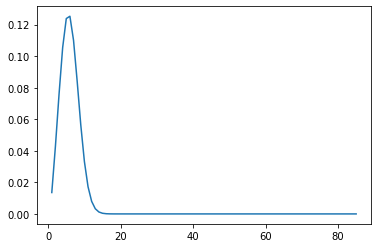

In [76]:
pd.Series(scipy.stats.beta(alpha_esposa,beta_esposa,13,87).cdf(17)-scipy.stats.beta(alpha_esposa,beta_esposa,13,87).cdf(16)).plot()

In [77]:
wid_m=pd.DataFrame(columns=range(14,101))
wid_f=pd.DataFrame(columns=range(14,101))
dists_m=scipy.stats.beta(alpha_esposa,beta_esposa,13,87)
dists_f=scipy.stats.beta(alpha_esposo,beta_esposo,13,87)
for c in wid_f.columns:
    wid_f[c]=pd.Series(dists_f.cdf(c)-dists_f.cdf(c-1),index=range(15,101))
    wid_m[c]=pd.Series(dists_m.cdf(c)-dists_m.cdf(c-1),index=range(15,101))

In [78]:
wid_f=wid_f.mul(p_m['M'],axis=0).loc[15::]    
wid_m=wid_m.mul(p_m['H'],axis=0).loc[15::]

In [79]:
wid_m

,14,15,16,17,18,19,20,21,22,23,...,91,92,93,94,95,96,97,98,99,100
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8.981903e-03,3.564172e-04,2.044652e-04,1.405560e-04,1.050102e-04,8.233465e-05,6.662279e-05,5.511587e-05,4.634740e-05,3.946390e-05,...,5.769868e-10,3.513489e-10,2.014926e-10,1.069902e-10,5.128450e-11,2.131784e-11,7.171154e-12,1.707512e-12,2.110925e-13,5.192498e-15
17,9.766414e-03,1.612174e-03,9.587457e-04,6.572982e-04,4.809760e-04,3.653702e-04,2.843130e-04,2.249379e-04,1.801008e-04,1.454842e-04,...,1.775147e-14,5.746229e-15,1.621823e-15,3.850127e-16,7.155103e-17,8.517979e-18,1.703596e-18,0.000000e+00,0.000000e+00,0.000000e+00
18,9.051528e-03,3.540640e-03,2.340755e-03,1.677852e-03,1.247496e-03,9.466808e-04,7.275388e-04,5.637475e-04,4.392342e-04,3.434722e-04,...,2.455739e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
19,6.581438e-03,5.049420e-03,3.940424e-03,3.078751e-03,2.403154e-03,1.872371e-03,1.455488e-03,1.128512e-03,8.725539e-04,6.726574e-04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.812698e-25,1.722149e-21,3.624105e-19,1.584456e-17,2.910083e-16,3.085841e-15,2.242123e-14,1.236822e-13,5.533880e-13,2.100762e-12,...,4.611546e-02,4.904901e-02,5.144810e-02,5.303885e-02,5.346637e-02,5.226819e-02,4.883209e-02,4.231735e-02,3.146361e-02,1.367637e-02
97,9.705423e-24,4.396206e-20,5.992954e-18,1.919918e-16,2.766488e-15,2.405497e-14,1.478338e-13,7.057977e-13,2.781841e-12,9.433748e-12,...,4.263831e-02,4.633020e-02,4.987379e-02,5.307648e-02,5.566130e-02,5.722135e-02,5.713307e-02,5.436068e-02,4.687119e-02,2.775248e-02
98,6.153009e-22,1.302028e-18,1.134488e-16,2.635375e-15,2.954723e-14,2.092674e-13,1.081783e-12,4.448746e-12,1.538181e-11,4.642453e-11,...,3.820826e-02,4.225905e-02,4.649869e-02,5.085056e-02,5.518679e-02,5.929258e-02,6.279148e-02,6.495868e-02,6.408664e-02,5.187479e-02
99,4.620973e-20,4.476274e-17,2.458075e-15,4.094983e-14,3.542071e-13,2.029589e-12,8.775775e-12,3.093874e-11,9.345033e-11,2.500909e-10,...,3.316964e-02,3.720662e-02,4.167712e-02,4.662260e-02,5.208869e-02,5.812616e-02,6.479306e-02,7.215990e-02,8.032884e-02,8.965853e-02


In [80]:
wid_m.sum()

14     0.041106
15     0.026084
16     0.031744
17     0.039566
18     0.049156
         ...   
96     0.448969
97     0.419154
98     0.388157
99     0.356174
100    0.337733
Length: 87, dtype: float64

<AxesSubplot:>

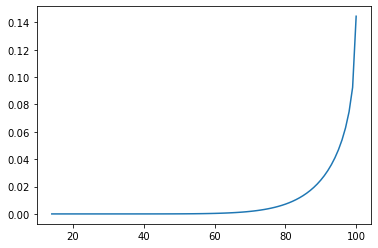

In [81]:
wid_m.transpose()[100].plot()

In [82]:
wid_f

,14,15,16,17,18,19,20,21,22,23,...,91,92,93,94,95,96,97,98,99,100
15,2.908934e-04,8.037092e-04,1.158475e-03,1.372465e-03,1.475818e-03,1.496631e-03,1.458568e-03,1.380682e-03,1.277851e-03,1.161396e-03,...,6.241319e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,1.812391e-04,7.249481e-04,1.277204e-03,1.720885e-03,2.028610e-03,2.205660e-03,2.270533e-03,2.245999e-03,2.154696e-03,2.017009e-03,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,9.543897e-05,5.554738e-04,1.213701e-03,1.882124e-03,2.455776e-03,2.885925e-03,3.159868e-03,3.286476e-03,3.286197e-03,3.184381e-03,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,3.958634e-05,3.381858e-04,9.285466e-04,1.675848e-03,2.442561e-03,3.126426e-03,3.665454e-03,4.032158e-03,4.224752e-03,4.258497e-03,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,1.340496e-05,1.700509e-04,5.937147e-04,1.260191e-03,2.069617e-03,2.906701e-03,3.672474e-03,4.297209e-03,4.742204e-03,4.995728e-03,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.177993e-17,2.655857e-15,6.117865e-14,5.451042e-13,2.899440e-12,1.118685e-11,3.470285e-11,9.196284e-11,2.163736e-10,4.639193e-10,...,3.550690e-03,0.004212,0.005043,0.006114,0.007540,0.009531,0.012511,0.017537,0.028344,0.163941
97,1.777332e-12,5.379961e-11,3.623445e-10,1.335625e-09,3.591142e-09,7.964091e-09,1.551729e-08,2.755233e-08,4.562185e-08,7.154297e-08,...,1.878266e-03,0.002183,0.002569,0.003070,0.003746,0.004712,0.006205,0.008846,0.014978,0.212893
98,4.864496e-07,1.396704e-06,2.286955e-06,3.176871e-06,4.073251e-06,4.979917e-06,5.899479e-06,6.833954e-06,7.785026e-06,8.754191e-06,...,4.955294e-04,0.000559,0.000640,0.000746,0.000890,0.001097,0.001424,0.002016,0.003448,0.257945
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

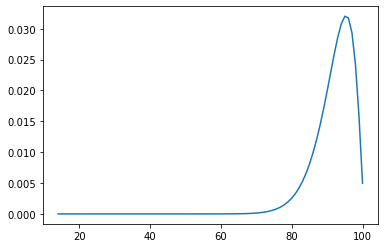

In [83]:
wid_f.transpose()[90].plot()

In [84]:
wid_f.sum()

14     0.000626
15     0.002717
16     0.005839
17     0.009937
18     0.015032
         ...   
96     0.270990
97     0.255697
98     0.246874
99     0.255648
100    0.913632
Length: 87, dtype: float64

<AxesSubplot:>

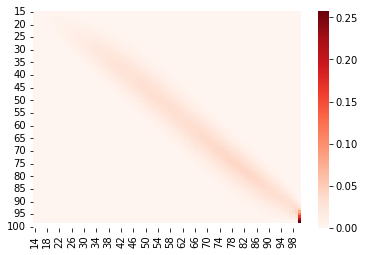

In [85]:
sns.heatmap(wid_f,cmap='Reds')

<AxesSubplot:>

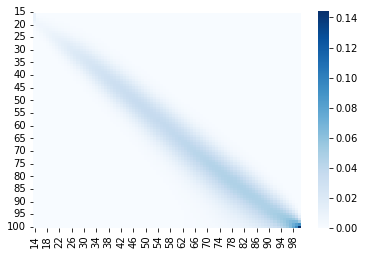

In [86]:
sns.heatmap(wid_m,cmap='Blues')

In [89]:
wid_m.reindex(range(0,106)).reindex(columns=range(0,106)).fillna(0).to_csv('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Family Structure/ssc_fwid_male_input.csv', sep="\t",
             decimal= ".")
#wid_m.to_excel('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Transition Probabilities/ssc_fwid_male.xlsx')
wid_f.reindex(range(0,106)).reindex(columns=range(0,106)).fillna(0).to_csv('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Family Structure/ssc_fwid_female_input.csv',sep="\t",
             decimal= ".")
#wid_f.to_excel('Y:/IESS_2020/Data/SSC/Input/Escenario_Base/Demographic/Transition Probabilities/ssc_fwid_female.xlsx')